<a href="https://colab.research.google.com/github/santhoshbvsrk/DeepLearning/blob/main/MNIST/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Importing tensorflow package and all relevant libraries.

In [14]:
import tensorflow as tf                  #import Tensorflow library
from tensorflow import keras             #import Keras api library for tensorflow
from keras import datasets               #import datasets provided by Keras API 

import numpy as np                      
import matplotlib.pyplot as plt              

In [15]:
fashion=datasets.fashion_mnist          #instantiating Fashion dataset from MNIST under Keras

In [16]:
(train_images,train_labels),(test_images,test_labels)=fashion.load_data()   #loading MNIST Fashion dataset which does train & test split internally and the default split is 0.2 i.e, 80% train & 20% test

In [17]:
# checking the shape of x_train, y_train, x_test & y_test variables
print(train_images.shape)            
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [18]:
from sklearn.model_selection import train_test_split

np.random.seed=1000

validation_images,test_images,validation_labels,test_labels = train_test_split(test_images,test_labels, train_size=0.5)

print(train_images.shape)            
print(train_labels.shape)
print(validation_images.shape)
print(validation_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(5000, 28, 28)
(5000,)
(5000, 28, 28)
(5000,)


In [19]:
train_images[0]    #checking the data present in first row of x_train

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [20]:
train_labels[0]    #checking data present in first row of y_train 

9

In [21]:
class_names=['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']  #creating a variable to hold name of the target variable values.

In [22]:
#creating a function to plot images from training dataset
def plot_sample(X,y,index):
  plt.figure(figsize = (5,2))
  plt.imshow(X[index],cmap=plt.cm.binary)   #this function is used to print image & cmap=plt.cm.binary makes the color of image to black & white
  plt.xlabel(class_names[y[index]])

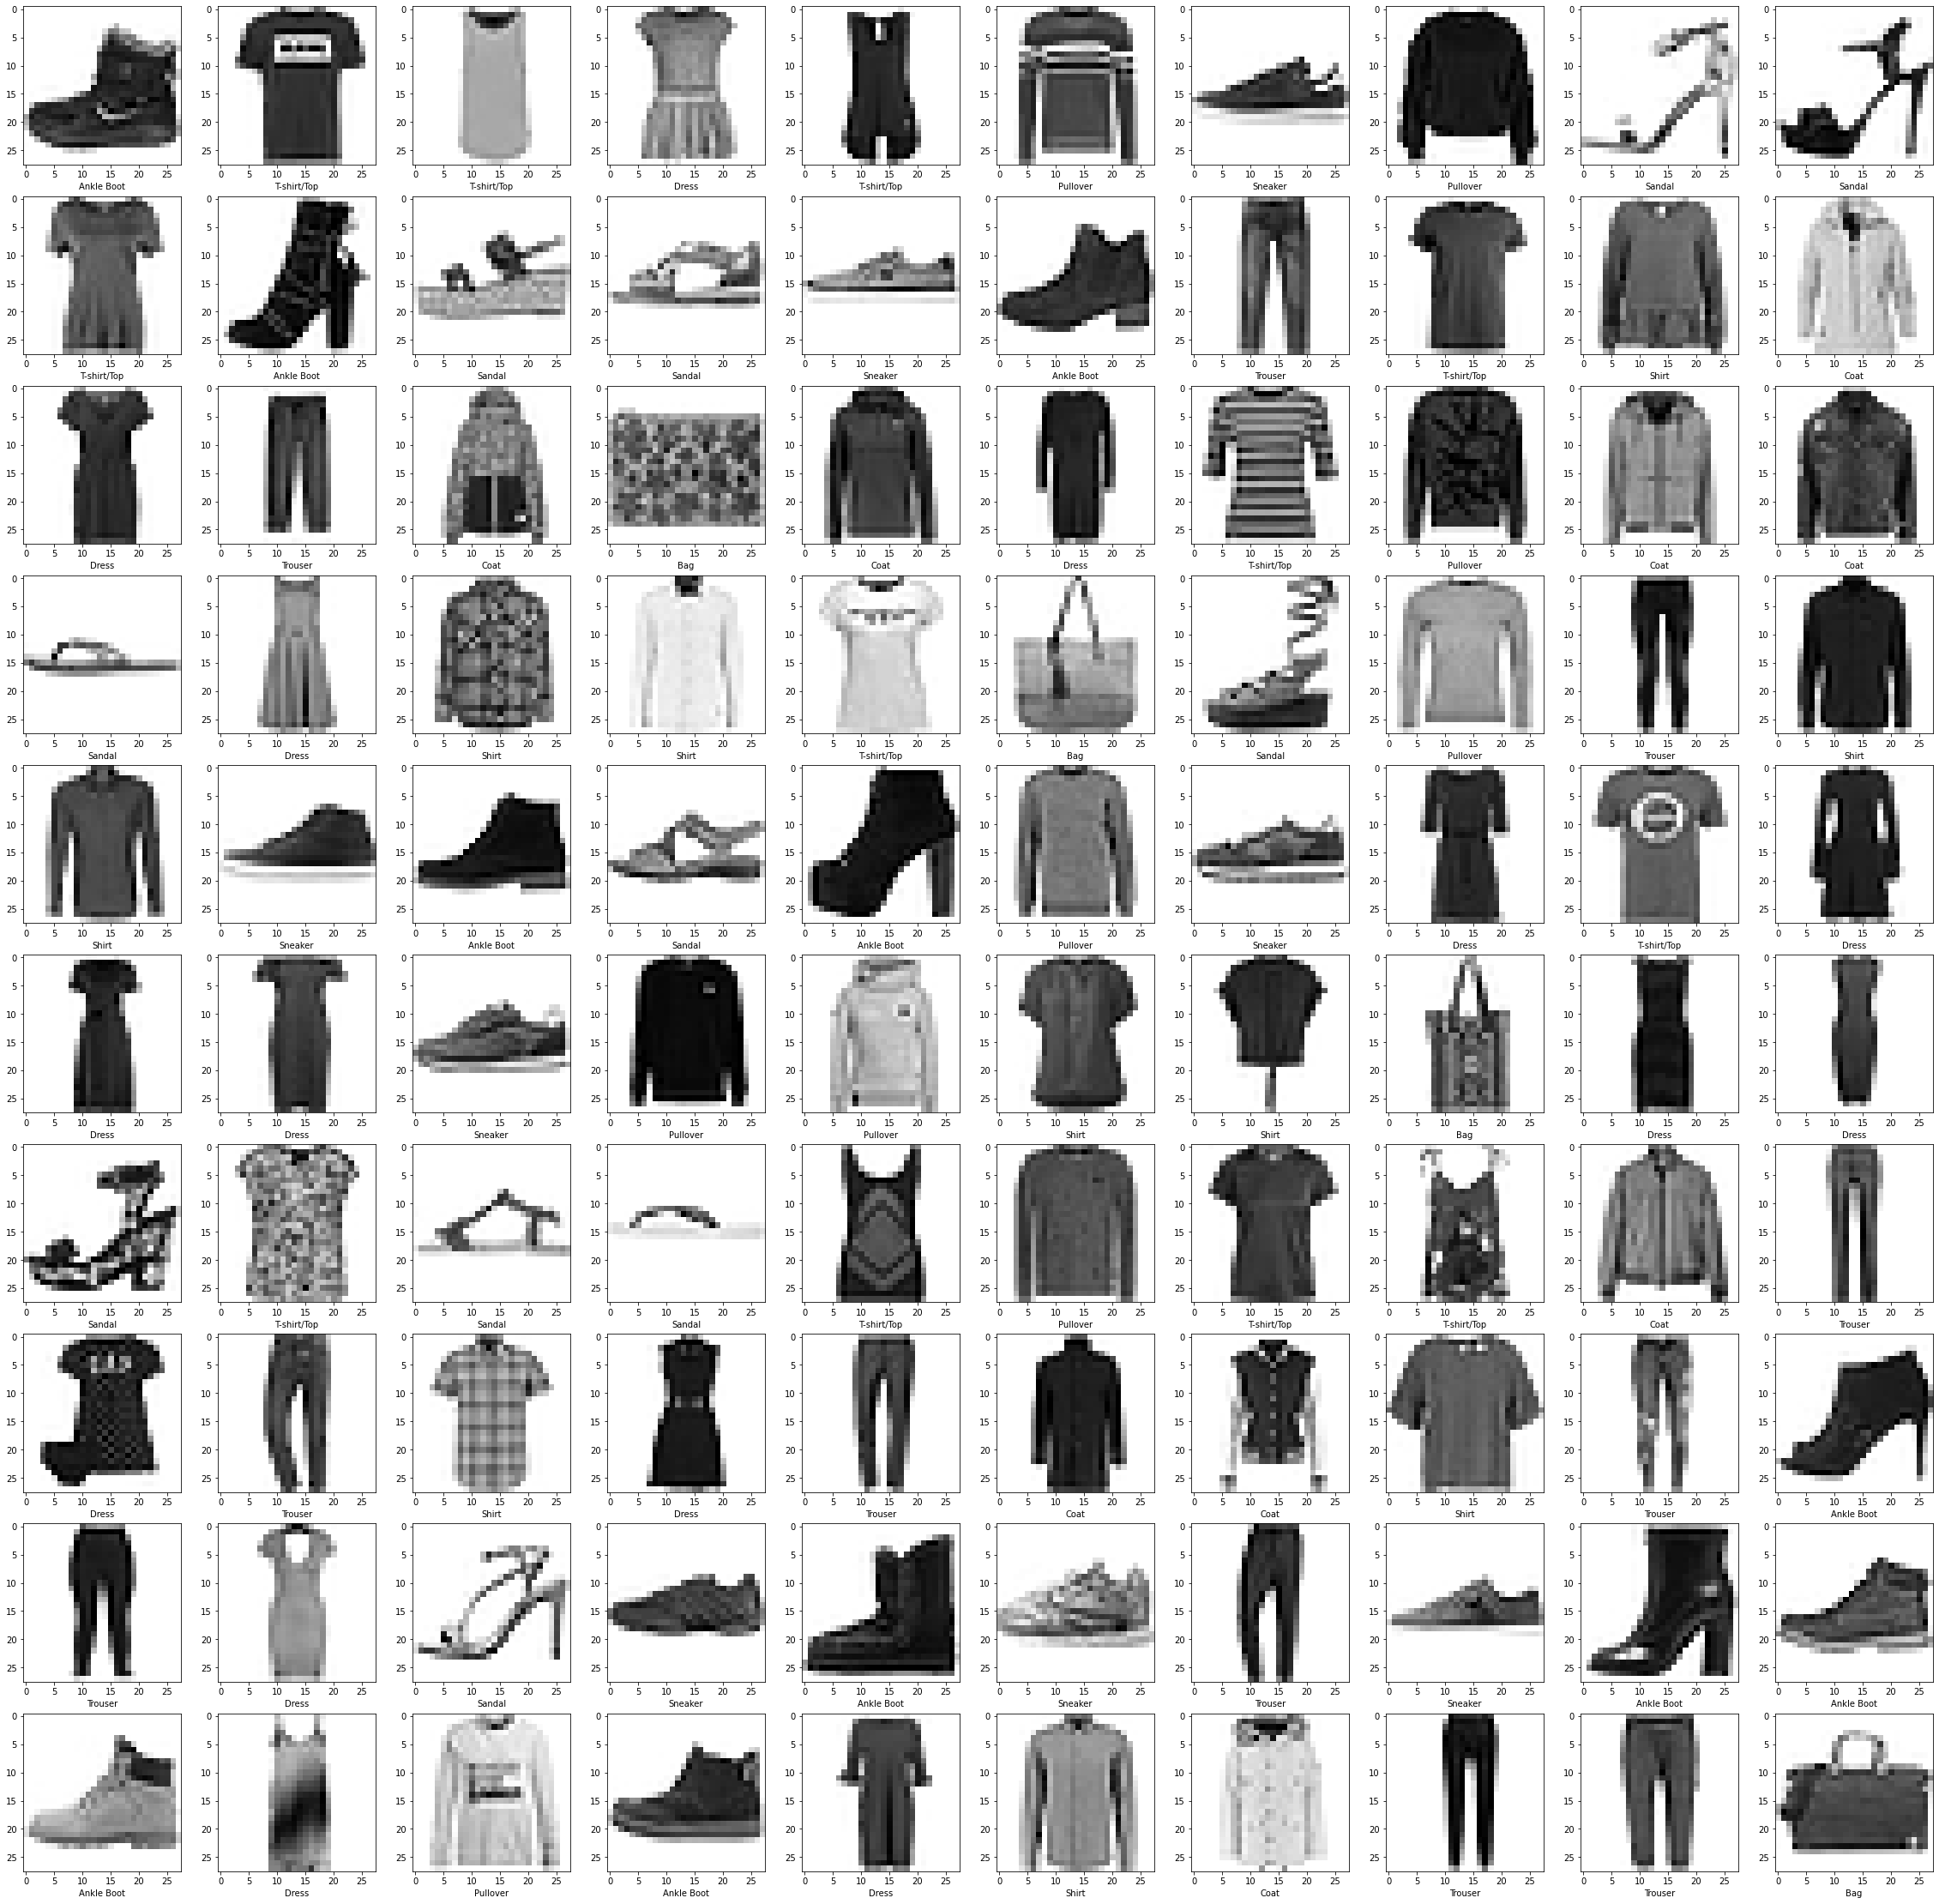

In [49]:
#printing first 100 images from the training dataset by calling the above created function
plt.figure(figsize=(40,40))
for index in range(100):  
  plt.subplot(10,10,index+1)
  plt.imshow(train_images[index],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[index]])
plt.show()

In [24]:
#normalizing dataset i.e., the value in each and image has values from 0 to 255 which is nothing but the pixel, we'll normalize it to be between 0-1. 
#Normalizing will be done on the images from both training & testing datasets
train_images = train_images / 255.0
validation_images = validation_images / 255.0
test_images = test_images / 255.0

In [25]:
from keras import models         #importing models package from Keras
from keras import Sequential     #importing Sequential package from Keras to create a Sequential model
from keras import layers         #importing layers package from Keras which will be used for adding Input Layers, Hidden Layers & Output Layers

### Model with Relu Activation and a single Hidden Layer

In [26]:
model = Sequential([layers.Flatten(input_shape=(28,28)),  #we mention the input shape as the number of input pixels
layers.Dense(100,activation='relu'),                      #This is Hidden Layer1 and 100 is the number of neurons to be created with activation function as 'relu'
layers.Dense(10,activation='softmax')                     #This is Output Layer with 10 neurons in the output layer and here we've to mention the number of neurons as the number of output values in target variable and activation function ='softmax' for classifiction problem
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) #compiling model. Here loss is 'sparse_categorical_crossentropy' as that gets the cell value directly rather than one hot encoding which categorical_cross entropy fetches

model.summary()    #printing summary of the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
300/300 [==============================] - 2s 5ms/step - loss: 0.8664 - accuracy: 0.7055 - val_loss: 0.4637 - val_accuracy: 0.8320
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.4345 - accuracy: 0.8495 - val_loss: 0.4191 - val_accuracy: 0.8522
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3904 - accuracy: 0.8632 - val_loss: 0.4015 - val_accuracy: 0.8560
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3617 - accuracy: 0.8725 - val_loss: 0.3850 - val_accuracy: 0.8636
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3453 - accuracy: 0.8780 - val_loss: 0.3707 - val_accuracy: 0.8668
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3179 - accuracy: 0.8866 - val_loss: 0.3672 - val_accuracy: 0.8676
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3102 - accuracy: 0.8882 - val_loss: 0.3615 - val_accuracy: 0.8716
Epoch 

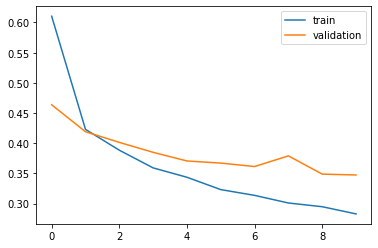

In [27]:
history = model.fit(x=train_images,y=train_labels,epochs=10,batch_size=200,verbose=1,validation_data=(validation_images,validation_labels)) #Fitting model on train & validation data to see accuracy & loss of model

#plot to see training & validation loss
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()
plt.show()

* From the above we see that Accuracy of Training is 93.32% & Validation is 89.45% for 10 epochs.
* Also the Loss on Training is 0.1838 & Validation is 0.3167 for 10 epochs.
* The validation loss is not decreasing.

* Let us perform regularization on data to remove overfit.

### L2 Regularizer

In [28]:
from keras import regularizers

model_l2reg = Sequential([layers.Flatten(input_shape=(28,28)),
layers.Dense(100,activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
layers.Dense(10,activation='softmax')
])

model_l2reg.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model_l2reg.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
300/300 [==============================] - 2s 5ms/step - loss: 0.8642 - accuracy: 0.7130 - val_loss: 0.5091 - val_accuracy: 0.8318
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.4622 - accuracy: 0.8483 - val_loss: 0.4484 - val_accuracy: 0.8490
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.4248 - accuracy: 0.8597 - val_loss: 0.4415 - val_accuracy: 0.8516
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3981 - accuracy: 0.8695 - val_loss: 0.4108 - val_accuracy: 0.8626
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3692 - accuracy: 0.8790 - val_loss: 0.4071 - val_accuracy: 0.8590
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3661 - accuracy: 0.8781 - val_loss: 0.4117 - val_accuracy: 0.8628
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3474 - accuracy: 0.8841 - val_loss: 0.3963 - val_accuracy: 0.8656
Epoch 

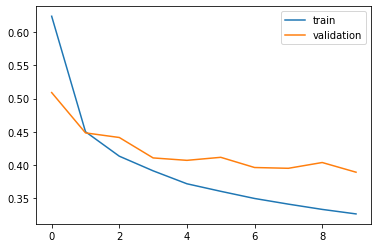

In [29]:
history_l2reg = model_l2reg.fit(x=train_images,y=train_labels,epochs=10,batch_size=200,verbose=1,validation_data=(validation_images,validation_labels))

#plot to see training & validation loss
plt.plot(history_l2reg.history['loss'],label='train')
plt.plot(history_l2reg.history['val_loss'],label='validation')
plt.legend()
plt.show()

* From the above we see that Accuracy of Training is 89.82% & Validation is 87.5% for 10 epochs.
* Also the Loss on Training is 0.3125 & Validation is 0.3804 for 10 epochs.

### L1 Regularizer

In [30]:
from keras import regularizers

model_l1reg = Sequential([layers.Flatten(input_shape=(28,28)),
layers.Dense(100,activation='relu',kernel_regularizer=regularizers.l1(0.0001)),
layers.Dense(10,activation='softmax')
])

model_l1reg.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model_l1reg.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
300/300 [==============================] - 2s 5ms/step - loss: 1.1144 - accuracy: 0.7215 - val_loss: 0.6884 - val_accuracy: 0.8294
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.6528 - accuracy: 0.8415 - val_loss: 0.6262 - val_accuracy: 0.8396
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.5868 - accuracy: 0.8541 - val_loss: 0.5963 - val_accuracy: 0.8408
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.5493 - accuracy: 0.8590 - val_loss: 0.5557 - val_accuracy: 0.8478
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.5195 - accuracy: 0.8637 - val_loss: 0.5437 - val_accuracy: 0.8508
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.4974 - accuracy: 0.8697 - val_loss: 0.5177 - val_accuracy: 0.8562
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.4795 - accuracy: 0.8721 - val_loss: 0.5089 - val_accuracy: 0.8604
Epoch 

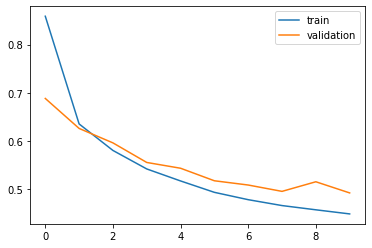

In [31]:
history_l1reg = model_l1reg.fit(x=train_images,y=train_labels,epochs=10,batch_size=200,verbose=1,validation_data=(validation_images,validation_labels))

#plot to see training & validation loss
plt.plot(history_l1reg.history['loss'], label='train')
plt.plot(history_l1reg.history['val_loss'],label='validation')
plt.legend()
plt.show()

* From the above we see that Accuracy of Training is 87.65% & Validation is 85.91% for 10 epochs.
* Also the Loss on Training is 0.4476 & Validation is 0.4858 for 10 epochs.

### L1 Regularizer with 2 Hidden Layers

In [32]:
from keras import regularizers

model_l1reg_2layers = Sequential([layers.Flatten(input_shape=(28,28)),
layers.Dense(100,activation='relu',kernel_regularizer=regularizers.l1(0.0001)),
layers.Dense(80,activation='relu',kernel_regularizer=regularizers.l1(0.0001)),
layers.Dense(10,activation='softmax')
])

model_l1reg_2layers.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model_l1reg_2layers.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_7 (Dense)              (None, 80)                8080      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                810       
Total params: 87,390
Trainable params: 87,390
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
300/300 [==============================] - 2s 7ms/step - loss: 1.1949 - accuracy: 0.7087 - val_loss: 0.7116 - val_accuracy: 0.8362
Epoch 2/10
300/300 [==============================] - 1s 5ms/step - loss: 0.6616 - accuracy: 0.8485 - val_loss: 0.6314 - val_accuracy: 0.8494
Epoch 3/10
300/300 [==============================] - 1s 5ms/step - loss: 0.5912 - accuracy: 0.8599 - val_loss: 0.5973 - val_accuracy: 0.8484
Epoch 4/10
300/300 [==============================] - 1s 5ms/step - loss: 0.5507 - accuracy: 0.8689 - val_loss: 0.5656 - val_accuracy: 0.8598
Epoch 5/10
300/300 [==============================] - 1s 5ms/step - loss: 0.5231 - accuracy: 0.8728 - val_loss: 0.5316 - val_accuracy: 0.8634
Epoch 6/10
300/300 [==============================] - 1s 5ms/step - loss: 0.4966 - accuracy: 0.8769 - val_loss: 0.5290 - val_accuracy: 0.8644
Epoch 7/10
300/300 [==============================] - 1s 5ms/step - loss: 0.4823 - accuracy: 0.8785 - val_loss: 0.5238 - val_accuracy: 0.8608
Epoch 

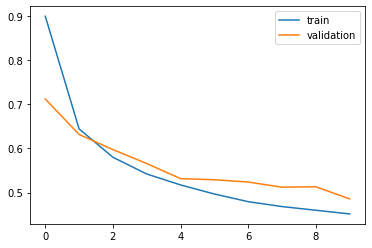

In [33]:
history_l2reg_2lay = model_l1reg_2layers.fit(x=train_images,y=train_labels,epochs=10,batch_size=200,verbose=1,validation_data=(validation_images,validation_labels))

#plot to see training & validation loss
plt.plot(history_l2reg_2lay.history['loss'], label='train')
plt.plot(history_l2reg_2lay.history['val_loss'], label='validation')
plt.legend()
plt.show()

* From the above we see that Accuracy of Training is 88.61% & Validation is 87.08% for 10 epochs.
* Also the Loss on Training is 0.4542 & Validation is 0.4975 for 10 epochs.

### 25% Dropout with 2 Hidden Layers


* ***NOTE***: Dropouts are used to reduce overfitting i.e., it'll eliminate few neurons at each and every layer so that it doesn't train more on the train data leading to overfit.

In [34]:
from keras.layers import Dense
from keras.layers.core import Dropout

model_2layers_do = Sequential()

model_2layers_do.add(layers.Flatten(input_shape=(28,28)))
model_2layers_do.add(Dense(100,activation='relu')), Dropout(0.25)  #using dropout of 25% to eliminate neurons from HL1, so that model won't learn too much from train data
model_2layers_do.add(Dense(80,activation='relu')), Dropout(0.25)   #using dropout of 25% to eliminate neurons from HL2, so that model won't learn too much from train data
model_2layers_do.add(Dense(10,activation='softmax'))

model_2layers_do.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

model_2layers_do.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_10 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                810       
Total params: 87,390
Trainable params: 87,390
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
300/300 [==============================] - 2s 5ms/step - loss: 0.8408 - acc: 0.7301 - val_loss: 0.4597 - val_acc: 0.8386
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.4110 - acc: 0.8540 - val_loss: 0.4095 - val_acc: 0.8492
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3758 - acc: 0.8669 - val_loss: 0.3990 - val_acc: 0.8610
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3438 - acc: 0.8769 - val_loss: 0.3744 - val_acc: 0.8670
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3212 - acc: 0.8828 - val_loss: 0.3641 - val_acc: 0.8674
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3029 - acc: 0.8911 - val_loss: 0.3526 - val_acc: 0.8734
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2958 - acc: 0.8933 - val_loss: 0.3446 - val_acc: 0.8774
Epoch 8/10
300/300 [==============================] - 1s 4ms/step - loss: 0.

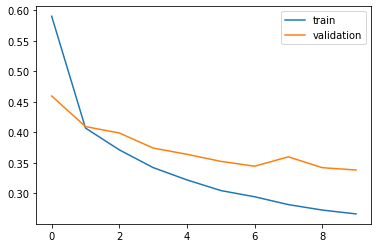

In [35]:
history_2layers_do = model_2layers_do.fit(x=train_images,y=train_labels,epochs=10,batch_size=200,verbose=1,validation_data=(validation_images,validation_labels))

#plot to see training & validation loss
plt.plot(history_2layers_do.history['loss'],label='train')
plt.plot(history_2layers_do.history['val_loss'],label='validation')
plt.legend()
plt.show()

* From the above we see that Accuracy of Training is 90.52% & Validation is 87.81% for 10 epochs.
* Also the Loss on Training is 0.2577 & Validation is 0.3377 for 10 epochs.
* Though the Validation loss is less when compared to other models, it has started to increase.

### Early Stopping Callback with 2 Hidden Layers


* NOTE: *We are using early stopping call back method to handle the problem from previous model i.e., validation loss increasing after a certain number of epochs.*
* *In Early Stopping, before calculating Validation Loss of the next epoch it'll compare it with previous epochs validation loss and stops a step before if that has a less Validation Loss*.
* *Sometimes it may so happen that validation loss starts decreasing from a minimum value after a certain number of epochs. This can be handled with a parameter 'patience'. It is better to give high value for patience so that it'll stop after a certain number of epochs.*

In [36]:
from keras.callbacks import EarlyStopping  #importing EarlyStopping package from Keras Callbacks

model_2layers_es = Sequential()

model_2layers_es.add(layers.Flatten(input_shape=(28,28)))
model_2layers_es.add(Dense(100,activation='relu'))
model_2layers_es.add(Dense(80,activation='relu'))
model_2layers_es.add(Dense(10,activation='softmax'))

model_2layers_es.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

model_2layers_es.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_13 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                810       
Total params: 87,390
Trainable params: 87,390
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6369 - acc: 0.7796 - val_loss: 0.4121 - val_acc: 0.8448
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3718 - acc: 0.8660 - val_loss: 0.3737 - val_acc: 0.8644
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3333 - acc: 0.8770 - val_loss: 0.3699 - val_acc: 0.8656
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3092 - acc: 0.8864 - val_loss: 0.3546 - val_acc: 0.8722
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2871 - acc: 0.8941 - val_loss: 0.3624 - val_acc: 0.8676
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2725 - acc: 0.8997 - val_loss: 0.3524 - val_acc: 0.8734
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2687 - acc: 0.8990 - val_loss: 0.3794 - val_acc: 0.8590
Epoch 8/10
1875/1875 [==============================] - 4s 2ms

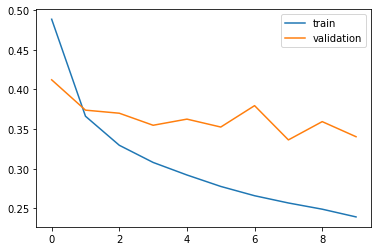

In [37]:
history_es = model_2layers_es.fit(x=train_images,y=train_labels,epochs=10,validation_data=(validation_images,validation_labels),callbacks=[EarlyStopping(monitor='val_loss', patience=3,mode='min',verbose=1)])
#Monitor='val_loss' is to tell the model to monitor val_loss value, with a patience of 3 i.e., after finding a min value on val_loss see 3 more epochs if at all the val_loss is further decreasing if not stop the model.


#plot to see training & validation loss
plt.plot(history_es.history['loss'],label='train')
plt.plot(history_es.history['val_loss'],label='validation')
plt.legend()
plt.show()

* From the above we see that Accuracy of Training is 94.99% & Validation is 88.42% for 10 epochs.
* Also the Loss on Training is 0.1312 & Validation is 0.5255 for 10 epochs.
* Here the model has stopped at epoch 6, because the minimum val_loss is at epoch3 and it did wait for 3 more epochs (patience=3) to see if the val_loss is decreasing further.

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2306 - acc: 0.9122 - val_loss: 0.3397 - val_acc: 0.8796
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2245 - acc: 0.9148 - val_loss: 0.3350 - val_acc: 0.8810
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2159 - acc: 0.9191 - val_loss: 0.3518 - val_acc: 0.8814
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2125 - acc: 0.9199 - val_loss: 0.3561 - val_acc: 0.8794
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2040 - acc: 0.9233 - val_loss: 0.3487 - val_acc: 0.8804
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1975 - acc: 0.9243 - val_loss: 0.3625 - val_acc: 0.8846
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1961 - acc: 0.9265 - val_loss: 0.3743 - val_acc: 0.8728
Epoch 8/10
1875/1875 [==============================] - 4s 2ms

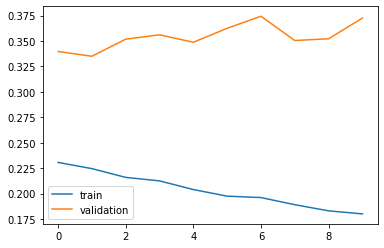

In [38]:
history_es = model_2layers_es.fit(x=train_images,y=train_labels,epochs=10,validation_data=(validation_images,validation_labels),callbacks=[EarlyStopping(monitor='val_loss', patience=200,mode='min',verbose=1)])
#Monitor='val_loss' is to tell the model to monitor val_loss value, with a patience of 3 i.e., after finding a min value on val_loss see 3 more epochs if at all the val_loss is further decreasing if not stop the model.


#plot to see training & validation loss
plt.plot(history_es.history['loss'],label='train')
plt.plot(history_es.history['val_loss'],label='validation')
plt.legend()
plt.show()

* As we gave a high patience value of 300 the model did not stop even after it the validation loss started to increase.

### Early Stopping & Model Check Point callbacks with 2 Hidden Layers

* NOTE: *In the previous model it did not stop even when val_loss is less at a specific point as the patience is high and if we give a less patience value then it'll miss the epoch where the val_loss may further decrease after the patience. To encounter this problem we'll be using ModelCheckPoint, where we store the minimum val_loss in a variable and will overwrite it with the next min val_loss only.*

In [39]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint   #importing ModelCheckPoint library from keras.callback

model_2layers_es_cp = Sequential()

model_2layers_es_cp.add(layers.Flatten(input_shape=(28,28)))
model_2layers_es_cp.add(Dense(100,activation='relu'))
model_2layers_es_cp.add(Dense(80,activation='relu'))
model_2layers_es_cp.add(Dense(10,activation='softmax'))

model_2layers_es_cp.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['acc'])

model_2layers_es_cp.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_16 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_17 (Dense)             (None, 10)                810       
Total params: 87,390
Trainable params: 87,390
Non-trainable params: 0
_________________________________________________________________


* NOTE: *Advantage of using 2 Callbacks is one can take care of loss (ES in our case) and one can take care of accuracy (CP in our case)*

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0622 - acc: 0.6549 - val_loss: 0.5586 - val_acc: 0.8058

Epoch 00001: val_acc improved from -inf to 0.80580, saving model to best_model.h5
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5105 - acc: 0.8220 - val_loss: 0.5245 - val_acc: 0.8154

Epoch 00002: val_acc improved from 0.80580 to 0.81540, saving model to best_model.h5
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4608 - acc: 0.8400 - val_loss: 0.4542 - val_acc: 0.8394

Epoch 00003: val_acc improved from 0.81540 to 0.83940, saving model to best_model.h5
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4339 - acc: 0.8480 - val_loss: 0.4431 - val_acc: 0.8432

Epoch 00004: val_acc improved from 0.83940 to 0.84320, saving model to best_model.h5
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4133 - acc: 0.8565 - val_loss: 0.4357 - val_a

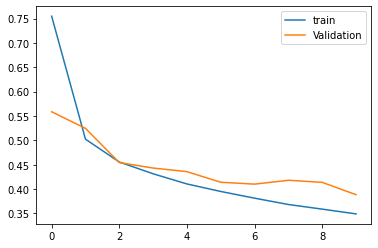

In [40]:
from keras.models import load_model

es = EarlyStopping(monitor='val_loss',patience=200,mode='min',verbose=1)
cp = ModelCheckpoint('best_model.h5',monitor='val_acc',mode='max',verbose=1,save_best_only=True) #the best model will be stored in best_model.h5 file which will be created in the instance which we are saving

history_2layers_es_cp = model_2layers_es_cp.fit(x=train_images,y=train_labels,epochs=10,validation_data=(validation_images,validation_labels),callbacks=[es,cp])
#Monitor='val_loss' is to tell the model to monitor val_loss value, with a patience of 3 i.e., after finding a min value on val_loss see 3 more epochs if at all the val_loss is further decreasing if not stop the model.

saved_model = load_model('best_model.h5')

_, train_acc = saved_model.evaluate(train_images,train_labels,verbose=0)
_, validation_acc = saved_model.evaluate(validation_images,validation_labels,verbose=0)

print('Train: %3f, Validation: %3f' % (train_acc,validation_acc))
print('\n')
#plot to see training & Validation loss
plt.plot(history_2layers_es_cp.history['loss'],label='train')
plt.plot(history_2layers_es_cp.history['val_loss'],label='Validation')
plt.legend()
plt.show()

* The best model has an accuracy of 87.17% & 85.39% on Training & Test data respectively with Stocastic Gradient Descent optimizer.
* The loss on Test has come down.

### Predicting the target values

In [41]:
predictions_es_cp = model_2layers_es_cp.predict(test_images) #predicting value using the Early Stopping model.

In [42]:
predictions_es_cp[0] # this gives the one hot encoding value of the target variable for the provided index.
print("Predicted Value of {} image from Test Data is: {}".format(0,np.argmax(predictions_es_cp[0]))) #this gives the value of prediction.
print("Actual value of {} image is: {}".format(0,test_labels[0])) #this gives the actual value

Predicted Value of 0 image from Test Data is: 0
Actual value of 0 image is: 0


In [43]:
_, test_acc = saved_model.evaluate(test_images,test_labels,verbose=0)
print('Test Accuracy is: %3f' % (test_acc))

Test Accuracy is: 0.859400


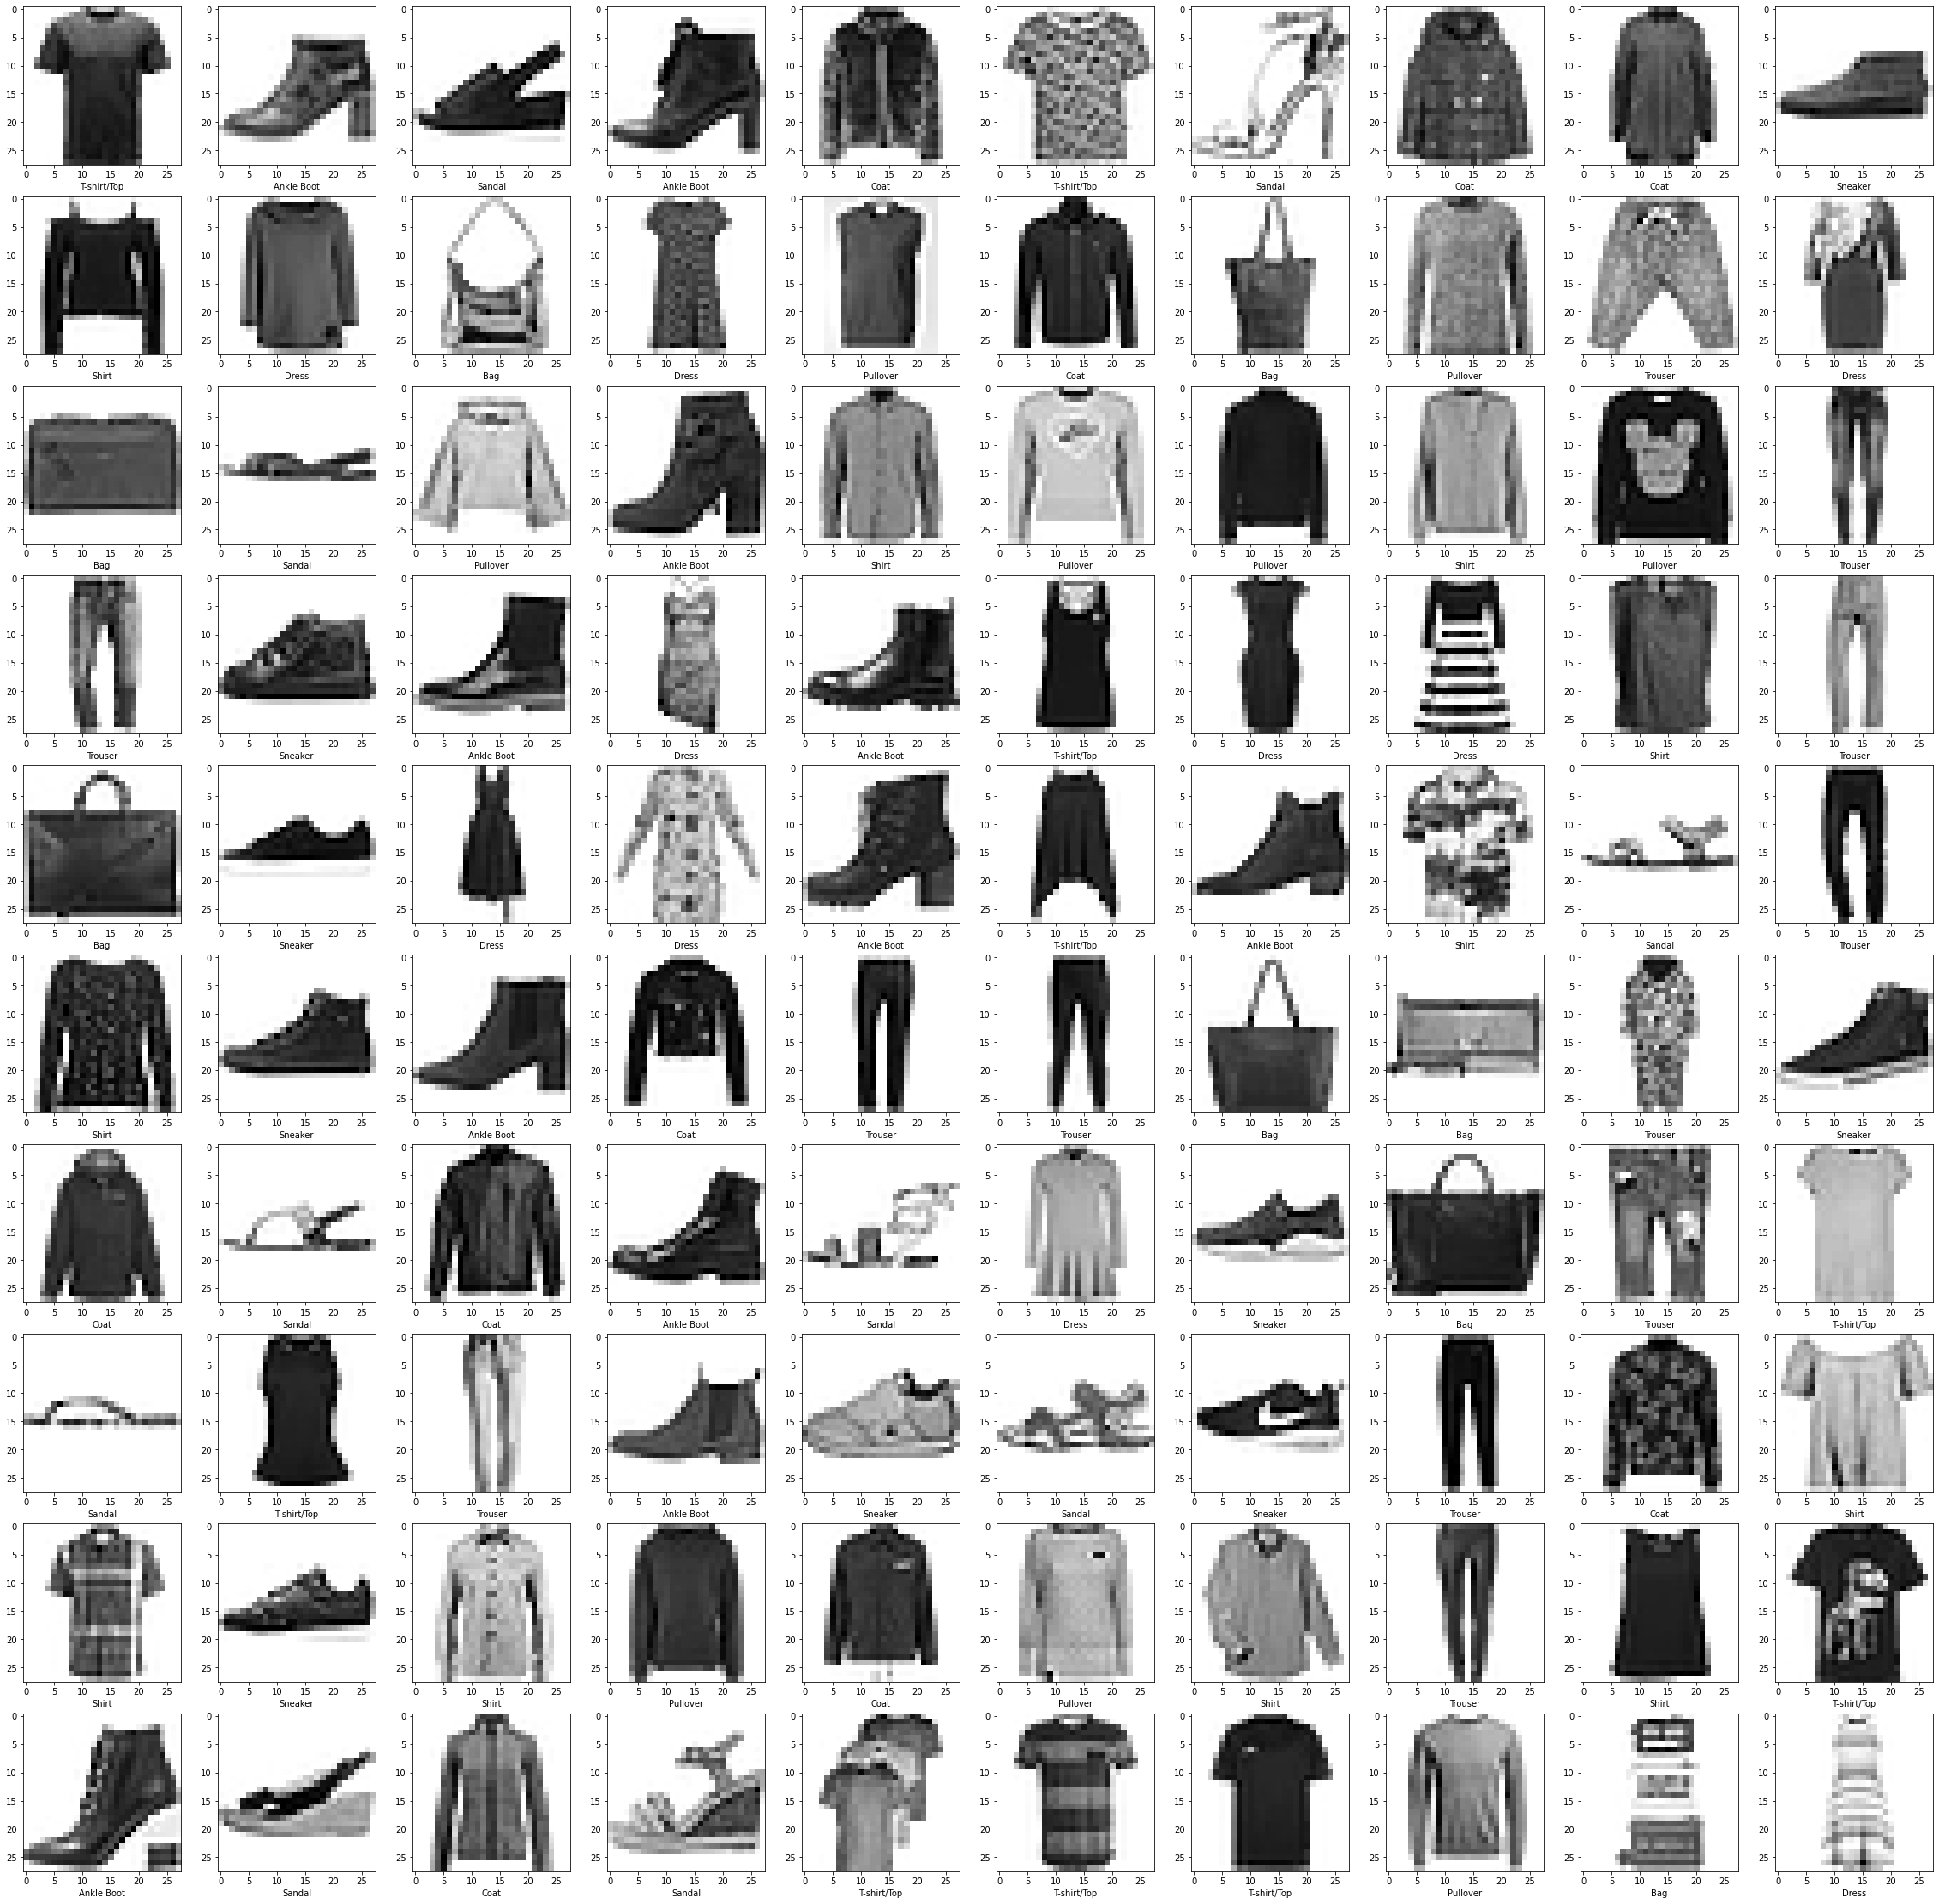

In [48]:
#printing first 100 images from the training dataset by calling the above created function. Here image is from our prediction & Label on X-axis is actual value.
plt.figure(figsize=(40,40))
for index in range(100):  
  plt.subplot(10,10,index+1)
  plt.imshow(test_images[index],cmap=plt.cm.binary)
  plt.xlabel(class_names[test_labels[index]])
plt.show()

### Conclusion

* This shows that actual & predicted values are correct atleast for the first 10 instances with an accuracy of 86%.

* We can repeat this process by choosing a model where the validation accuracy is more to attain a better Test Accuracy.